<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

# An Open Data case study:  Hot-spots for Arrests in LA over time


## What is an API?

Some examples:

Mapping API's

- [Google Maps API](https://developers.google.com/maps/documentation/javascript/overview#maps_map_simple-javascript)
- [Leaflet](https://leafletjs.com/)
- [Mapbox](https://docs.mapbox.com/mapbox-gl-js/example/)

Data API's
- [Twitter API](https://developer.twitter.com/en)
- [Metro API](https://developer.metro.net/api/)
- [Census API](https://www.census.gov/data/developers/guidance/api-user-guide.Example_API_Queries.html)


# Part 1: Mini project and code review: Mapping gun violence

As humans, we are troubled by recent events related to police brutality and gun violence. As planners, we are equipped with tools to do something about it. A quick scan reveals that open data exists on these issues, and one such source can be found with the Washington Post.

- https://github.com/washingtonpost/data-police-shootings

When you find a csv file posted in the GitHub account that is trustworthy, you can directly access it and pull the data into a Jupyter notebook (you may use this method to access your own csv data for example). However, you must first click on the "View raw" link and use **that** URL.

<img src="images/git%20view%20raw.png" width=600>

Next, copy the URL that produces the raw view of the data.

<img src="images/git raw url.png" width="600">

Now we can investigate and see if this data is usable within our Jupyter interface. Let's begin by importing some libraries.

In [3]:
# libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

Hey? What is `contextily`? Yes, it's a new library we are using that allows us to choose a basemap to put our data on top of. We'll learn more about this as we move along.

- https://github.com/darribas/contextily

In [4]:
# import the data into a new variable
df = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv")

In [5]:
# check the data, specifically for the latitude and longitude columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9341 entries, 0 to 9340
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9341 non-null   int64  
 1   date                        9341 non-null   object 
 2   threat_type                 9268 non-null   object 
 3   flee_status                 8054 non-null   object 
 4   armed_with                  9126 non-null   object 
 5   city                        9269 non-null   object 
 6   county                      4542 non-null   object 
 7   state                       9341 non-null   object 
 8   latitude                    8294 non-null   float64
 9   longitude                   8294 non-null   float64
 10  location_precision          8294 non-null   object 
 11  name                        8900 non-null   object 
 12  age                         8875 non-null   float64
 13  gender                      9309 

### From dataframe (df) to geodataframe (gdf)
Whenever you bring data into a jupyter notebook that is in a `json` or `csv` format, *if* the data contains separate columns for latitude and longitude, you can convert the data into a geodataframe for mapping purposes.

Things to note: If the data has latitude and longitude coordinates, it is a **[geographic coordinate system (GCS)](https://en.wikipedia.org/wiki/World_Geodetic_System)** with a crs code `epsg:4326`.

In [6]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

### What is the projection?

In [7]:
# output the data's projection, description in class that the bounds are necessary to understand the data (also this can be a reason the data doesn't plot). This is mercator projection.
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The key output here is `WGS 84` indicating that the data is in geographic

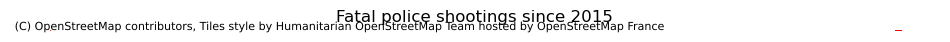

In [8]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Fatal police shootings since 2015')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

Note: You have many `marker` [options](https://matplotlib.org/stable/api/markers_api.html)

Nice. What makes this process **powerful**? And what are potential **pitfalls**?

In [9]:
#calculating bounding box
bbox = gdf.total_bounds

print('Bounding Box:')
print('min Longitude:', bbox[0])
print('min Latitude:', bbox[1])
print('min Longitude:',bbox[2])
print('min Longitude:',bbox[3])

Bounding Box:
min Longitude: -9007175462532118.0
min Latitude: 19.4975033
min Longitude: -67.8671657
min Longitude: 71.3012553


In [11]:
#he listed out printing the longitude and latitude to see the issue
us = gpd.read_file('unitedStates-Copy1.json')
us.set_crs('epsg:4326')

id                  name    density  \
0   01               Alabama     94.650   
1   02                Alaska      1.264   
2   04               Arizona     57.050   
3   05              Arkansas     56.430   
4   06            California    241.700   
5   08              Colorado     49.330   
6   09           Connecticut    739.100   
7   10              Delaware    464.300   
8   11  District of Columbia  10065.000   
9   12               Florida    353.400   
10  13               Georgia    169.500   
11  15                Hawaii    214.100   
12  16                 Idaho     19.150   
13  17              Illinois    231.500   
14  18               Indiana    181.700   
15  19                  Iowa     54.810   
16  20                Kansas     35.090   
17  21              Kentucky    110.000   
18  22             Louisiana    105.000   
19  23                 Maine     43.040   
20  24              Maryland    596.300   
21  25         Massachusetts    840.200   
22  26              Michigan    173.900   
23  27             Minnesota     67.140   
24  28           Mississippi     63.500   
25  29              Missouri     87.260   
26  30               Montana      6.858   
27  31              Nebraska     23.970   
28  32                Nevada     24.800   
29  33         New Hampshire    147.000   
30  34            New Jersey   1189.000   
31  35            New Mexico     17.160   
32  36              New York    412.300   
33  37        North Carolina    198.200   
34  38          North Dakota      9.916   
35  39                  Ohio    281.900   
36  40              Oklahoma     55.220   
37  41                Oregon     40.330   
38  42          Pennsylvania    284.300   
39  44          Rhode Island   1006.000   
40  45        South Carolina    155.400   
41  46          South Dakota     98.070   
42  47             Tennessee     88.080   
43  48                 Texas     98.070   
44  49                  Utah     34.300   
45  50               Vermont     67.730   
46  51              Virginia    204.500   
47  53            Washington    102.600   
48  54         West Virginia     77.060   
49  55             Wisconsin    105.200   
50  56               Wyoming      5.851   
51  72           Puerto Rico   1082.000   

                                             geometry  
0   POLYGON ((-87.35930 35.00118, -85.60667 34.984...  
1   MULTIPOLYGON (((-131.60202 55.11798, -131.5691...  
2   POLYGON ((-109.04250 37.00026, -109.04798 31.3...  
3   POLYGON ((-94.47384 36.50186, -90.15254 36.496...  
4   POLYGON ((-123.23326 42.00619, -122.37885 42.0...  
5   POLYGON ((-107.91973 41.00391, -105.72895 40.9...  
6   POLYGON ((-73.05353 42.03905, -71.79931 42.022...  
7   POLYGON ((-75.41409 39.80446, -75.50720 39.683...  
8   POLYGON ((-77.03526 38.99387, -76.90929 38.895...  
9   POLYGON ((-85.49714 30.99754, -85.00421 31.003...  
10  POLYGON ((-83.10919 35.00118, -83.32279 34.787...  
11  MULTIPOLYGON (((-155.63484 18.94827, -155.8813...  
12  POLYGON ((-116.04751 49.00024, -116.04751 47.9...  
13  POLYGON ((-90.63998 42.51006, -88.78878 42.493...  
14  POLYGON ((-85.99006 41.75972, -84.80704 41.759...  
15  POLYGON ((-91.36842 43.50139, -91.21506 43.501...  
16  POLYGON ((-101.90605 40.00163, -95.30634 40.00...  
17  POLYGON ((-83.90335 38.76931, -83.67879 38.632...  
18  POLYGON ((-93.60849 33.01853, -91.16577 33.002...  
19  POLYGON ((-70.70392 43.05776, -70.82441 43.128...  
20  MULTIPOLYGON (((-75.99465 37.95325, -76.01655 ...  
21  POLYGON ((-70.91752 42.88797, -70.81894 42.871...  
22  MULTIPOLYGON (((-83.45424 41.73234, -84.80704 ...  
23  POLYGON ((-92.01470 46.70540, -92.09137 46.749...  
24  POLYGON ((-88.47111 34.99570, -88.20274 34.995...  
25  POLYGON ((-91.83396 40.60957, -91.72989 40.615...  
26  POLYGON ((-104.04753 49.00024, -104.04206 47.8...  
27  POLYGON ((-103.32458 43.00299, -101.62673 42.9...  
28  POLYGON ((-117.02788 42.00071, -114.04295 41.9...  
29  POLYGON ((-71.08183 45.30330, -71.03254 

In [12]:
bbox = us.total_bounds

print('Bounding Box:')
print('min Longitude:', bbox[0])
print('min Latitude:', bbox[1])
print('min Longitude:',bbox[2])
print('min Longitude:',bbox[3])

Bounding Box:
min Longitude: -188.90491
min Latitude: 17.929556
min Longitude: -65.626797
min Longitude: 71.351633


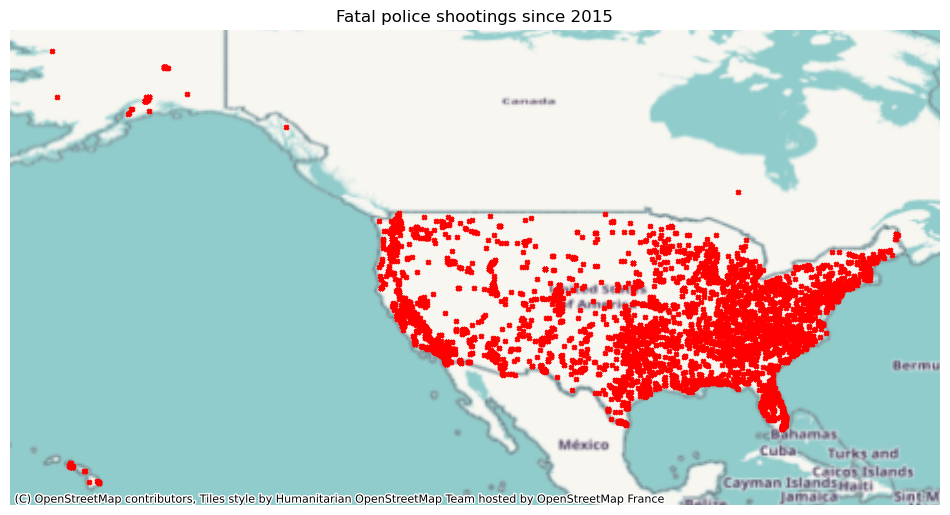

In [13]:
# Adding the clipped box
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
ax = gdf.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Fatal police shootings since 2015')

# add a basemap
ctx.add_basemap(ax, crs=4326) #

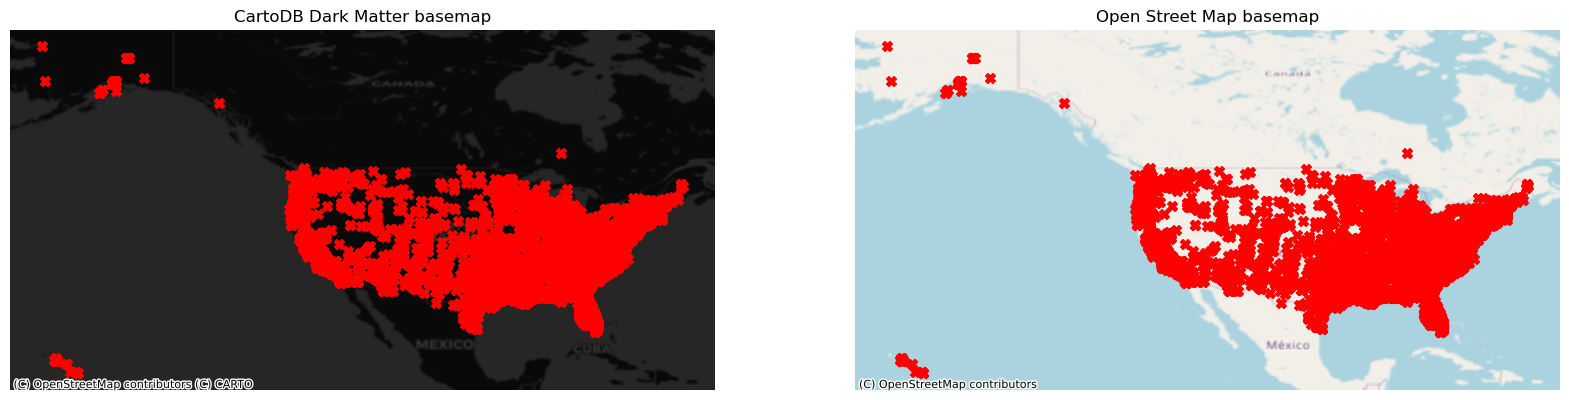

In [14]:
# two maps, different basemaps
fig, ax = plt.subplots(1,2,figsize=(20,12))

# Note that 2 plots were requested, so ax has two items: ax[0] and ax[1]
usbounds = [-189,18,-66,71]
# first map
gdf.clip(usbounds).plot(ax=ax[0], 
                      marker='X',
                      markersize=50,
                      color='red')

ax[0].axis('off')
ax[0].set_title('CartoDB Dark Matter basemap')

ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.DarkMatter,crs=4326)

# second map
gdf.clip(usbounds).plot(ax=ax[1], 
                      marker='X',
                      markersize=50,
                      color='red')

ax[1].axis('off')
ax[1].set_title('Open Street Map basemap')

ctx.add_basemap(ax[1], source=ctx.providers.OpenStreetMap.Mapnik,crs=4326)

### Multiple cities with a for loop

One of the fundamental features of coding is the "for" loop. It allows you to generate multiple outputs with a few lines of code by "looping" through various elements.

- pick cities to map 
- create a list of cities
- loop through each city to generate maps

In [16]:
# create a list of routes
cities = ["Los Angeles","San Francisco", "New York"]

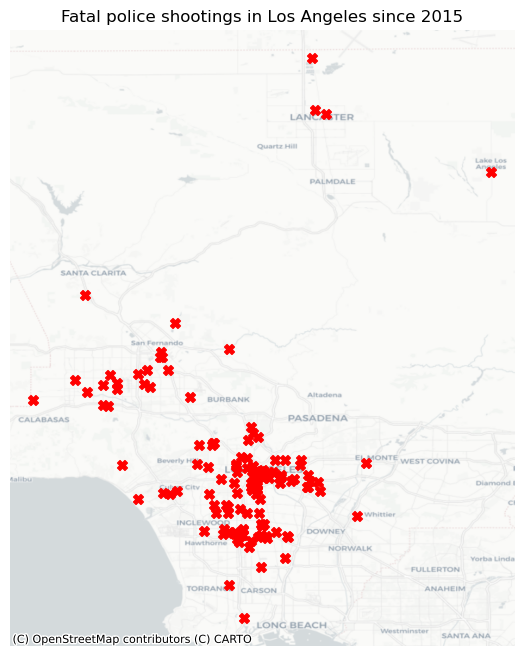

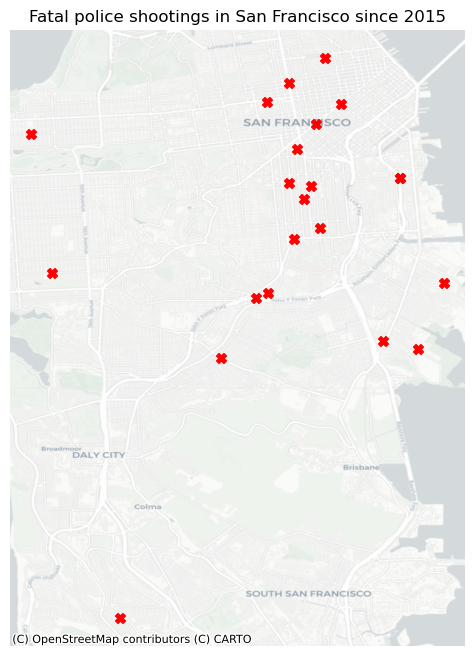

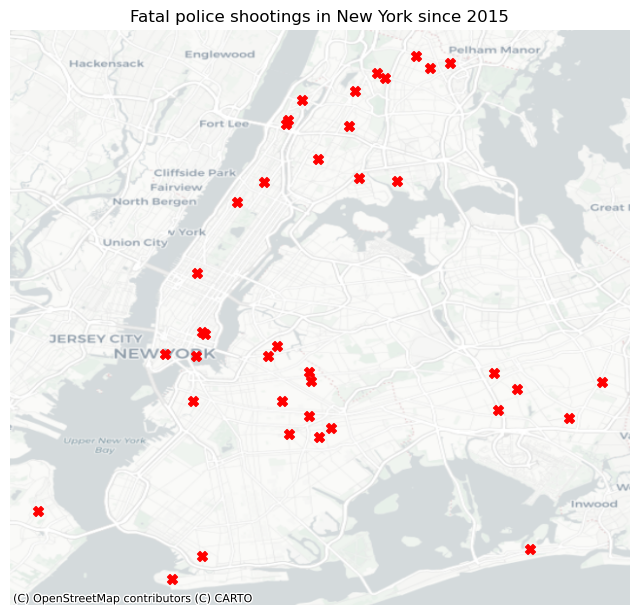

In [17]:
# loop through cities
for city in cities:

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    # map options: notice the query to filter by individual city
    gdf[gdf.city == city].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    # no axes
    ax.axis('off')

    # title
    ax.set_title('Fatal police shootings in '+str(city) + ' since 2015')

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

# Part 2 - Socrata: An open data portal for governments

Many governments use <a href="https://dev.socrata.com/" target="_blank">socrata</a> as their platform to serve data to the public. 
<img src="../images/socrata.png" width=600>

Example: [LA County Open Data Portal](https://data.lacounty.gov/)

<table>
    <tr>
        <td><a href="https://opendata.cityofnewyork.us/" target="_blank"><img src="images/ny.png" width=400></a></td>
        <td><a href="https://datasf.org/opendata/" target="_blank"><img src="images/sf.png" width=400></a></td>
    </tr>
    <tr>
        <td><a href="https://data.cityofchicago.org/" target="_blank"><img src="images/ch.png" width=400></a></td>
        <td><a href="https://data.lacity.org/" target="_blank"><img src="images/la.png" width=400></a></td>
    </tr>
</table>

For this tutorial, we will look at LAPD's arrest data:

https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72

The <a href="https://dev.socrata.com/docs/endpoints.html" target="_blank">Socrata API</a> allows direct and real-time access to open data.

To access the data, we will use the `sodapy` library: https://github.com/xmunoz/sodapy

Instructions on how to use `sodapy` to access data for this dataset:

<a href="https://data.lacity.org/Public-Safety/Arrest-Data-from-2020-to-Present/amvf-fr72/about_data" target="_blank"><img src="images/ladata1.png"></a>

https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

### Question:
- What is the difference between exporting the data and using the API?

### It's time to start coding: importing libraries

Let's begin our python journey. First, we identify the libraries we will use, and import them into our project:
- `pandas`
- `plotly express` - [documentation](https://plotly.com/python/plotly-express/)
- `sodapy` - [documentation](https://github.com/xmunoz/sodapy)

*Notice that we will NOT be using geopandas! Don't worry, there will still be very rewarding maps in this session*

In [1]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

### Creating a socrata client
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our crime data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [2]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("amvf-fr72", limit=2000)

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
arrests.sample(2)

rpt_id report_type                arst_date  time area  area_desc    rd  \
197  6638290     BOOKING  2023-07-09T00:00:00.000  0945   18  Southeast  1823   
861  6710289     BOOKING  2023-11-11T00:00:00.000  1215   01    Central  0162   

    age sex_cd descent_cd  ... :@computed_region_ur2y_g4cx  \
197  57      F          B  ...                           7   
861  30      M          B  ...                         NaN   

    :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s chrg_grp_cd  \
197                          14                          45          24   
861                           9                          76          06   

                    grp_description  \
197  Miscellaneous Other Violations   
861                         Larceny   

                                      chrg_desc                 bkg_date  \
197  REFUSE TO LEAVE PROPERTY UPON REQUEST P.O.  2023-07-09T00:00:00.000   
861                                 SHOPLIFTING  2023-11-11T00:00:00.000   

    bkg_time           bkg_location bkg_loc_cd  
197     1133                77TH ST       4212  
861     1603  METRO - JAIL DIVISION       4273  

[2 rows x 31 columns]

### Import data based on a query string
That's great! But what if you wanted something specific, like "all arrests in July, 2021?"

In [5]:
# add a "where" statement
results = client.get("amvf-fr72", 
                     limit = 10000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "arst_date between '2023-01-01T00:00:00' and '2023-02-01T00:00:00'"
                    )

In [6]:
# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

### Data Exploration and Analysis

In [7]:
# how many rows and columns?
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

In [11]:
# what fields and datatypes?
arrests.dtypes
arrests.info(verbose=True, show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

In [4]:
# what are the first 5 rows?
arrests.head()

rpt_id report_type                arst_date  time area   area_desc  \
0  231413977         RFC  2023-07-13T00:00:00.000  2330   14     Pacific   
1  231715213         RFC  2023-09-01T00:00:00.000  2300   17  Devonshire   
2  230612568         RFC  2023-07-14T00:00:00.000  2150   06   Hollywood   
3  230119897         RFC  2023-09-13T00:00:00.000  1332   01     Central   
4  230214008         RFC  2023-07-04T00:00:00.000  1445   02     Rampart   

     rd age sex_cd descent_cd  ... :@computed_region_ur2y_g4cx  \
0  1412  29      M          H  ...                          10   
1  1738  17      F          H  ...                         NaN   
2  0677  30      M          O  ...                         NaN   
3  0148  50      M          A  ...                         NaN   
4  0266  38      M          H  ...                         NaN   

  :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s chrg_grp_cd  \
0                          10                          30         NaN   
1                           2                          78         NaN   
2                           8                          57          13   
3                           9                          76         NaN   
4                          11                          68         NaN   

       grp_description     chrg_desc bkg_date bkg_time bkg_location bkg_loc_cd  
0                  NaN           NaN      NaN      NaN          NaN        NaN  
1                  NaN           NaN      NaN      NaN          NaN        NaN  
2  Prostitution/Allied  PROSTITUTION      NaN      NaN          NaN        NaN  
3                  NaN           NaN      NaN      NaN          NaN        NaN  
4                  NaN           NaN      NaN      NaN          NaN        NaN  

[5 rows x 31 columns]

## Introducting plotly

Now, use plotly express to create a bar chart.

- https://plotly.com/python/bar-charts/

What are the differences between matplotlib and plotly?

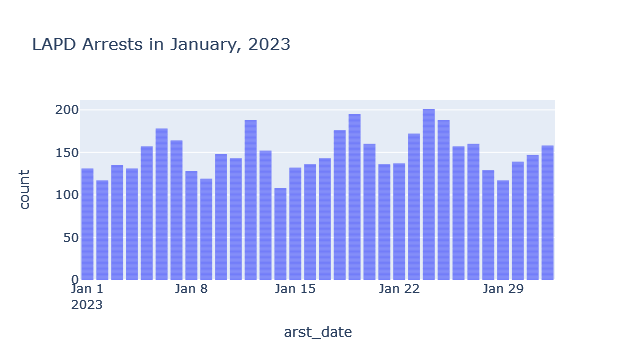

In [12]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(arrests,
       x='arst_date',
       title='LAPD Arrests in January, 2023'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

### Label axis

In plotly, you can relabel text by providing a dictionary as shown below:

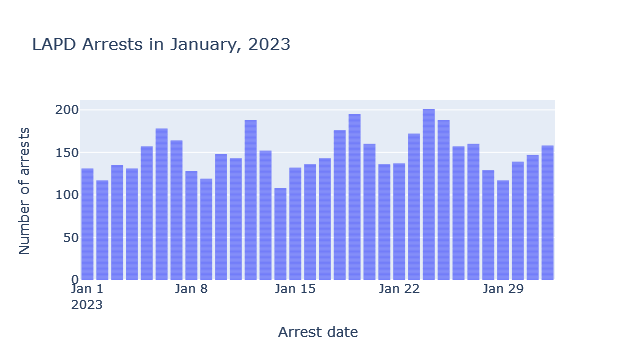

In [13]:
# add labels by providing a dict
fig = px.bar(
        arrests,
        x='arst_date',
        title='LAPD Arrests in January, 2023',
        labels={
            'arst_date':'Arrest date',
            'count':'Number of arrests'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Let's dig in further... what if we want to see the distribution of charge types by day?

In [14]:
# show me distinct value of charges
arrests.grp_description.unique().tolist()

['Receive Stolen Property',
 'Narcotic Drug Laws',
 'Aggravated Assault',
 'Driving Under Influence',
 'Robbery',
 'Vehicle Theft',
 'Other Assaults',
 'Larceny',
 'Weapon (carry/poss)',
 'Miscellaneous Other Violations',
 'Forgery/Counterfeit',
 'Burglary',
 'Moving Traffic Violations',
 'Homicide',
 'Sex (except rape/prst)',
 'Against Family/Child',
 nan,
 'Disorderly Conduct',
 'Drunkeness',
 'Fraud/Embezzlement',
 'Prostitution/Allied',
 'Liquor Laws',
 'Rape',
 'Non-Criminal Detention',
 'Disturbing the Peace',
 'Gambling',
 'Federal Offenses']

In [15]:
# show me distinct value of charges
arrest_by_charge = arrests.value_counts('grp_description').reset_index(name='count')
arrest_by_charge

grp_description  count
0               Aggravated Assault    679
1   Miscellaneous Other Violations    596
2                   Other Assaults    518
3          Driving Under Influence    420
4               Narcotic Drug Laws    381
5              Weapon (carry/poss)    356
6                          Larceny    278
7                    Vehicle Theft    218
8                          Robbery    179
9              Prostitution/Allied    148
10                        Burglary    133
11       Moving Traffic Violations    113
12              Disorderly Conduct     85
13            Against Family/Child     72
14          Sex (except rape/prst)     55
15              Fraud/Embezzlement     43
16                        Gambling     39
17                      Drunkeness     32
18                     Liquor Laws     32
19         Receive Stolen Property     31
20                        Homicide     26
21                            Rape     17
22             Forgery/Counterfeit     13
23          Non-Criminal Detention      8
24                Federal Offenses      4
25            Disturbing the Peace      3

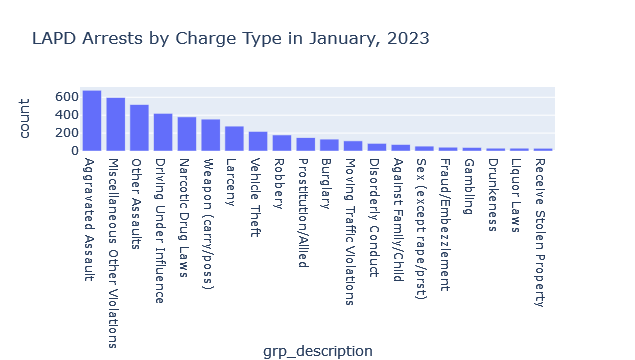

In [16]:
# plot the top 20 charges
fig = px.bar(arrest_by_charge.head(20),
       x='grp_description',
       y='count',
       title='LAPD Arrests by Charge Type in January, 2023')

fig.show()

### Stacked bar charts

What if you wanted to find out the distribution of crime types per day?

In [17]:
arrests_grouped = arrests.value_counts(['arst_date','grp_description']).reset_index(name='count')
arrests_grouped

arst_date                 grp_description  count
0    2023-01-24T00:00:00.000  Miscellaneous Other Violations     32
1    2023-01-25T00:00:00.000             Prostitution/Allied     32
2    2023-01-14T00:00:00.000              Aggravated Assault     30
3    2023-01-12T00:00:00.000  Miscellaneous Other Violations     30
4    2023-01-13T00:00:00.000              Aggravated Assault     28
..                       ...                             ...    ...
556  2023-01-03T00:00:00.000             Prostitution/Allied      1
557  2023-01-22T00:00:00.000         Receive Stolen Property      1
558  2023-01-17T00:00:00.000                      Drunkeness      1
559  2023-01-15T00:00:00.000              Disorderly Conduct      1
560  2023-01-01T00:00:00.000            Against Family/Child      1

[561 rows x 3 columns]

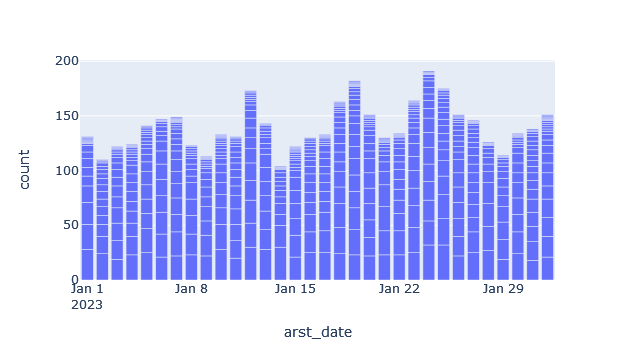

In [18]:
# make a bar chart
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count'
)

fig.show()

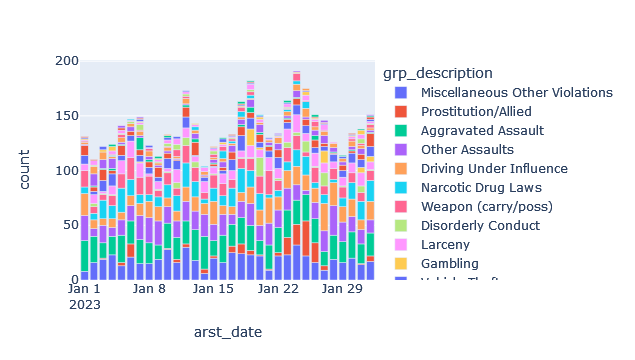

In [19]:
# make a stacked bar chart
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count',
       color='grp_description' # this creates the "stack"
)

fig.show()

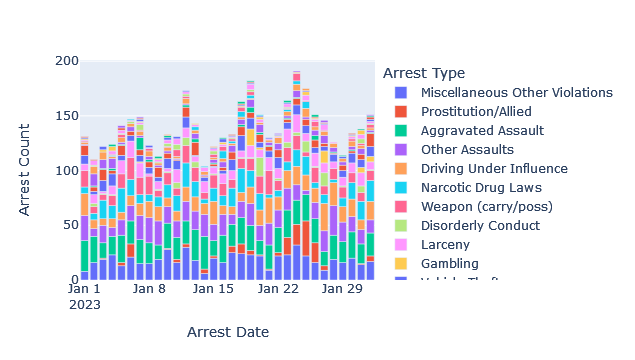

In [20]:
#cleaning up data
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count',
       color='grp_description' # this creates the "stack"
)

fig.update_layout(
    xaxis_title='Arrest Date',
    yaxis_title='Arrest Count',
    legend_title='Arrest Type'
)

fig.show()

Now it's your turn!

* Add a title
* Clean up the labels (arst_date, grp_description, etc)

## Data cleanup: subsetting your data

Let's go back to the original dataset.

In [ ]:
arrests.info()

That's a lot of fields. Let's create a subset of the data with just the following fields:

- `arst_date`
- `age`
- `descent_cd`
- `grp_description`
- `lat`
- `lon`

In list format:
```
['arst_date','age','descent_cd','grp_description','lat','lon']
```

In [ ]:
# subset the data below (don't forget to add .copy at the end)
arrests_mini = arrests[['arst_date','age','descent_cd','grp_description','lat','lon']].copy()

In [ ]:
# get info for our subset data
arrests_mini.info()

Our `lat` and `lon` columns need to be of data type float. Let's convert them.

In [ ]:
# convert lat/lon's to floats
arrests_mini['lat'] = arrests_mini['lat'].astype(float)
arrests_mini['lon'] = arrests_mini['lon'].astype(float)
arrests_mini.info()

What happens if we create a scatter plot, placing `lon` in the x-axis `lat` in the y-axis?

In [ ]:
# plot it
fig = px.scatter(arrests_mini,
           x='lon',
           y='lat'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

## Plotly maps
Plotly has support for a mapbox slippy map. 

- https://plotly.com/python/scattermapbox/

Have fun with this, and change the `mapbox_style` attribute to any of the following:

* `open-street-map`
* `white-bg`
* `carto-positron`
* `carto-darkmatter`
* `stamen-terrain`
* `stamen-toner`
* `stamen-watercolor`


In [ ]:
fig = px.scatter_mapbox(arrests_mini,
                        lat='lat',
                        lon='lon',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (December 2021)",
    title_x=0.5 # aligns title to center
)

fig.show()

In [ ]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(arrests_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="descent_cd",
                        labels={'descent_cd':'Race'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (January 2023)",
    title_x=0.5 # aligns title to center
)


fig.show()

Look at the function below, and see if you can figure out what it is meant to do:

In [ ]:
def race_map(race='H'):
    
    fig = px.scatter_mapbox(
                            arrests_mini[arrests_mini.descent_cd==race], 
                            lat="lat", 
                            lon="lon", 
                            color="descent_cd",
                            labels={'descent_cd':'Race'},
                            mapbox_style="carto-positron"
    )

    # options on the layout
    fig.update_layout(
        width = 600,
        height = 600,
        title = "Interactive LAPD Arrest Map (January 2023)<br>Showing where descent label is "+race,
        title_x=0.5 # aligns title to center
    )

    fig.show()

In [ ]:
# call the function (try other values)
race_map(race='B')

## Using a loop

In [ ]:
# get a list of distinct race values
race_list = arrests_mini.descent_cd.unique().tolist()
race_list

In [ ]:
# loop and map!
for race in race_list:
    race_map(race)

# Summarize by neighborhoods

Bring in neighborhoods directly from source:

- https://geohub.lacity.org/datasets/lahub::la-times-neighborhood-boundaries/about

In [ ]:
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [ ]:
neighborhoods.plot(figsize=(12,12))

In [ ]:
# convert arrests_mini to geodataframe
gdf = gpd.GeoDataFrame(
    arrests_mini, geometry=gpd.points_from_xy(arrests_mini.lon, arrests_mini.lat),crs=4326)

# check that it can be mapped
gdf.plot()

In [ ]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
arrest_by_neighborhood = gpd.sjoin(neighborhoods, gdf) #Spatial join Points to polygons
arrest_by_neighborhood

In [ ]:
# count the number of records per community
arrest_counts = arrest_by_neighborhood.value_counts('name').reset_index(name='arrest_count')
arrest_counts

In [ ]:
# add the count to the neighborhoods
neighborhoods = neighborhoods.merge(arrest_counts, how='left', on='name')

In [ ]:
neighborhoods.sample(10)

In [ ]:
# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax,column='arrest_count',legend=True,cmap='Reds')


<div class="alert alert-info">
Now it's your turn!

* Make the final map output "prettier"
* Find a socrata based open dataset
* Use the sodapy library and import it
* Conduct data exploration and analysis
* Create two or more plots using the plotly express library
* Create map visualization using plotly and/or the KeplerGL libraries
</div>
